In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import *
from qiskit.visualization import plot_histogram
%run CnotDecomp.ipynb #for importing ccx function
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from scipy import linalg

# IBMQ.save_account('fb30d6ed3e7c1557fe60e36b2c8818ea67ec079e4bc1a9d0ab89b0be7f42fdaf7a7934f3354e4bd67069ea5b783bdb6fa2c7826015aead948821b4ace90f4cf4

ERROR:root:File `'CnotDecomp.ipynb.py'` not found.


In [2]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
  

In [146]:
def toket(N,st):
    mat = eye(N)
    state = zeros(N)
    state = mat[:,st]
    return state

def outercalc(N,st1,st2):
    a=toket(N,st1)
    b=toket(N, st2)
    return outer(a,b)

def matrix(marked,marked2,gamma,N,adjunct):
    c = np.zeros((2**N,2**N))
    c[marked][marked] = -1.0*(5*gamma/6)
    c[marked2][marked2] = -1.0*(2*gamma/3)
    #c = c*gamma
    matprint(c)
    if adjunct==True :
        mat = linalg.expm(-1j*c)
    else:
        mat = linalg.expm(1j*c)
    print()
    print()
  #  matprint(mat)
    print()
    print()
    print(mat.diagonal())
    print()
    print()
    return mat

def oracle(N,mat):
    qreg = QuantumRegister(N)
    qc = QuantumCircuit(qreg)
    qc.diagonal(mat.tolist(),qreg)
    qc = transpile(qc,basis_gates =['cx','u3'],optimization_level=3)
    return qc

-2.61799        0  0  0  0  0  0  0  
       0  -2.0944  0  0  0  0  0  0  
       0        0  0  0  0  0  0  0  
       0        0  0  0  0  0  0  0  
       0        0  0  0  0  0  0  0  
       0        0  0  0  0  0  0  0  
       0        0  0  0  0  0  0  0  
       0        0  0  0  0  0  0  0  




[-0.8660254+0.5j       -0.5      +0.8660254j  1.       +0.j
  1.       +0.j         1.       +0.j         1.       +0.j
  1.       +0.j         1.       +0.j       ]


-2.61799        0  0  0  0  0  0  0  
       0  -2.0944  0  0  0  0  0  0  
       0        0  0  0  0  0  0  0  
       0        0  0  0  0  0  0  0  
       0        0  0  0  0  0  0  0  
       0        0  0  0  0  0  0  0  
       0        0  0  0  0  0  0  0  
       0        0  0  0  0  0  0  0  




[-0.8660254-0.5j       -0.5      -0.8660254j  1.       +0.j
  1.       +0.j         1.       +0.j         1.       +0.j
  1.       +0.j         1.       +0.j       ]




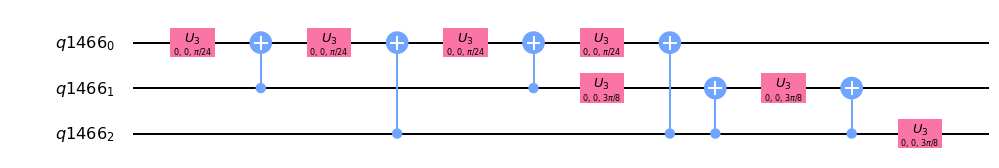

In [169]:
N=3
marked = 0
marked2 = 1
mat = matrix(marked,marked2,(np.pi),N,True).diagonal()
qcaux = oracle(N,mat)
qcaux.draw(output='mpl')

mat2 = matrix(marked,marked2,(np.pi),N,False).diagonal()
qcaux2 = oracle(N,mat2)
qcaux2.draw(output='mpl')

#print(mat)

In [170]:
qreg = QuantumRegister(N)
creg = ClassicalRegister(N)
qc = QuantumCircuit(qreg,creg)
angle = ((np.pi)/N)
steps =1

qc.h(qreg)
for t in range(steps):
    qc.append(qcaux,range(N))
    qc.rx(2*angle,qreg)
    qc.append(qcaux2,range(N))
    qc.rx(2*angle,qreg)
    qc.barrier()
    
qc.measure(qreg,creg)
qc.draw()

┌───┐┌──────────────┐┌───────────┐┌──────────────┐┌───────────┐ ░ ┌─┐»
q1485_0: ┤ H ├┤0             ├┤ RX(2pi/3) ├┤0             ├┤ RX(2pi/3) ├─░─┤M├»
         ├───┤│              │├───────────┤│              │├───────────┤ ░ └╥┘»
q1485_1: ┤ H ├┤1 circuit1612 ├┤ RX(2pi/3) ├┤1 circuit1632 ├┤ RX(2pi/3) ├─░──╫─»
         ├───┤│              │├───────────┤│              │├───────────┤ ░  ║ »
q1485_2: ┤ H ├┤2             ├┤ RX(2pi/3) ├┤2             ├┤ RX(2pi/3) ├─░──╫─»
         └───┘└──────────────┘└───────────┘└──────────────┘└───────────┘ ░  ║ »
  c59_0: ═══════════════════════════════════════════════════════════════════╩═»
                                                                              »
  c59_1: ═════════════════════════════════════════════════════════════════════»
                                                                              »
  c59_2: ═════════════════════════════════════════════════════════════════════»
                                                                              »
«               
«q1485_0: ──────
«         ┌─┐   
«q1485_1: ┤M├───
«         └╥┘┌─┐
«q1485_2: ─╫─┤M├
«          ║ └╥┘
«  c59_0: ═╬══╬═
«          ║  ║ 
«  c59_1: ═╩══╬═
«             ║ 
«  c59_2: ════╩═
«

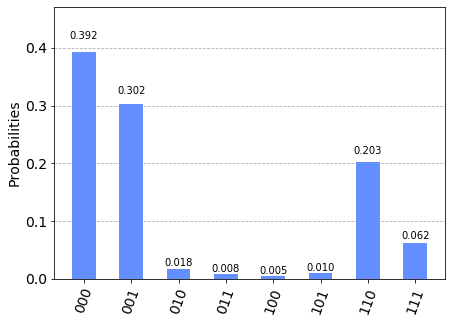

In [171]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend=backend,shots=1000)
result_sim = job_sim.result()
result_counts = result_sim.get_counts(qc)
plot_histogram(result_counts)